# Pre-lecture HW

Conversation for entire HW: https://chatgpt.com/share/67368462-5d58-8010-8780-31ab03407c83

#### 1:
1. Simple linear regression: models relationship between just two variables. <br> Multiple linear regression: models relationship between more than two independent variables and a dependent variable (increasing dimension)

2. Using a continuous variable means it can take on any value within a range, indicator means either 0 or 1. <br> Continuous variable: $y=b_0+b_1 x + \epsilon$ , where $x$ is continuous. <br> Indicator variable: $y=b_0 + b_1 D + \epsilon$, where $D$ is binary.

3. We now have two lines, one when the continuous variable = 0, and another when the continuous variable = 1. This just changes the intercept of the two lines. 

4. $y=b_0 + b_1 D + \epsilon$ turns into $y=b_0 + b_1 D + b_2 x + \epsilon$, where $D$ is binary and $x$ is continuous.

5. Given the indicator variables red, blue and green, we would have the linear form $y=b_0 + b_1 * x_{red} + b_2 * x_{blue} + b_3 * x_{green}$ <br> The encodings are shown below (green is 0, 0 as the lack of red and blue imply green)

| Color | Red | Blue |
|-------|-----|------|
| Red   | 1   | 0    |
| Blue  | 0   | 1    |
| Green | 0   | 0    |

Dummy variable trap: inclusion of all possible binary indicator variable leads to model estimation problems (multicollinearity)

#### 2:

1. **Outcome variable**: number of clicks / number of calls <br> **Predictor variables**: money spent on TV ads, money spent on online ads <br> The difference between the predictions with and without the interaction, is that without, it's just a linear factor of money spent on TV and online ads, but with, it incorporates how the money spent on TV affects the money spent on online ads
2. If the advertisement budgets were either 'high' or 'low', we could use indicator variables, assigning 0 or 1 depending if the budget was low or high respectively.

For example, $y=\beta_0 + \beta_1(TV) + \beta_2(Online) + \beta_3(TV * Online)$. If TV or Online are low, the third interaction will not be activated. 

#### 3:

In [1]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape

/var/folders/n9/82z91_7n6vlb6_km5d5w73zh0000gn/T/ipykernel_20751/4114330600.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)

In [2]:
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

In [14]:
dataV2_cohortV3['COVID_prevention_hand_washing'].value_counts()

COVID_prevention_hand_washing
Very closely        581
Somewhat closely    189
Not at all           39
Name: count, dtype: int64

In [9]:
col = 'COVID_vaccinated'
dataV2_cohortV3[col].value_counts()

COVID_vaccinated
Yes, three or more doses    358
Yes, one dose               207
No                          129
Yes, two doses              109
Name: count, dtype: int64

In [11]:
# Convert Yes/No in COVID_vaccinated column to 1/0, handling NaN values
dataV2_cohortV3[col] = dataV2_cohortV3[col].apply(lambda x: 1 if isinstance(x, str) and 'Yes' in x else 0)

# Verify the conversion
print(dataV2_cohortV3[col].value_counts())

COVID_vaccinated
1    674
0    176
Name: count, dtype: int64


Let's do "WELLNESS_subjective_happiness_scale_score" (continuous) "COVID_vaccinated" (turned from categorical into binary) and "COVID_prevention_hand_washing" (categorical). 

In [18]:
dataV2_cohortV3["COVID_prevention_hand_washing"].value_counts()

COVID_prevention_hand_washing
Very closely        581
Somewhat closely    189
Not at all           39
Name: count, dtype: int64

In [34]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Make a copy of the original DataFrame
data_copy = dataV2_cohortV3.copy()

# Ensure 'COVID_vaccinated' is binary (0/1) in the copy
# data_copy['COVID_vaccinated'] = data_copy['COVID_vaccinated'].apply(lambda x: 1 if isinstance(x, str) and 'Yes' in x else 0)

# Define the OLS model specification using C() for categorical variables
linear_model_specification = '''
Q('WELLNESS_subjective_happiness_scale_score') ~ COVID_vaccinated 
                                                + C(COVID_prevention_hand_washing, Treatment(reference='Not at all'))
'''

# Fit the model
model = smf.ols(linear_model_specification, data_copy).fit()
print("Model Summary:")
print(model.summary())


Model Summary:
                                          OLS Regression Results                                          
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_score')   R-squared:                       0.009
Model:                                                        OLS   Adj. R-squared:                  0.005
Method:                                             Least Squares   F-statistic:                     2.369
Date:                                            Thu, 14 Nov 2024   Prob (F-statistic):             0.0694
Time:                                                    03:43:27   Log-Likelihood:                -1428.5
No. Observations:                                             801   AIC:                             2865.
Df Residuals:                                                 797   BIC:                             2884.
Df Model:                                                       3                                         
Covariance Type:      

Additive Model Summary:
                                          OLS Regression Results                                          
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_score')   R-squared:                       0.009
Model:                                                        OLS   Adj. R-squared:                  0.005
Method:                                             Least Squares   F-statistic:                     2.369
Date:                                            Thu, 14 Nov 2024   Prob (F-statistic):             0.0694
Time:                                                    03:55:05   Log-Likelihood:                -1428.5
No. Observations:                                             801   AIC:                             2865.
Df Residuals:                                                 797   BIC:                             2884.
Df Model:                                                       3                                         
Covariance Ty

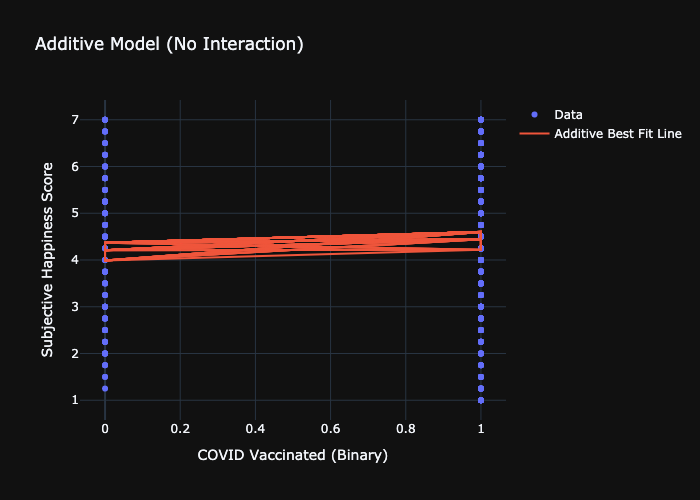

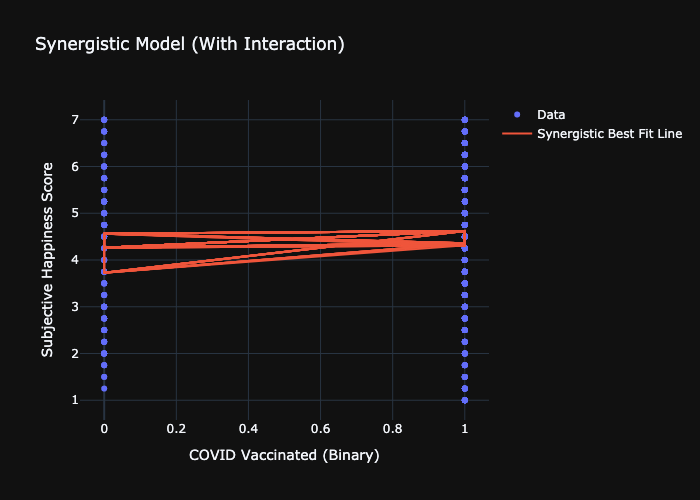

In [43]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px

# Make a copy of the original DataFrame
data_copy = dataV2_cohortV3.copy()

# Ensure 'COVID_vaccinated' is binary (0/1) in the copy
# data_copy['COVID_vaccinated'] = data_copy['COVID_vaccinated'].apply(lambda x: 1 if isinstance(x, str) and 'Yes' in x else 0)

# Define the Additive Model (no interaction term)
additive_model_spec = '''
Q('WELLNESS_subjective_happiness_scale_score') ~ COVID_vaccinated + C(COVID_prevention_hand_washing, Treatment(reference='Not at all'))
'''

# Fit the additive model
additive_model = smf.ols(additive_model_spec, data_copy).fit()

# Define the Synergistic Model (with interaction term)
synergistic_model_spec = '''
Q('WELLNESS_subjective_happiness_scale_score') ~ COVID_vaccinated + C(COVID_prevention_hand_washing, Treatment(reference='Not at all')) + COVID_vaccinated * C(COVID_prevention_hand_washing, Treatment(reference='Not at all'))
'''

# Fit the synergistic model
synergistic_model = smf.ols(synergistic_model_spec, data_copy).fit()

# Print the summary of both models
print("Additive Model Summary:")
print(additive_model.summary())
print("\nSynergistic Model Summary:")
print(synergistic_model.summary())

# Predictions for the best fit lines (Additive model)
data_copy['additive_pred'] = additive_model.predict(data_copy)

# Predictions for the best fit lines (Synergistic model)
data_copy['synergistic_pred'] = synergistic_model.predict(data_copy)

# Visualize the data and the best fit lines with Plotly

# Scatter plot with Additive line
fig_additive = go.Figure()

# Scatter plot of the data
fig_additive.add_trace(go.Scatter(x=data_copy['COVID_vaccinated'], y=data_copy['WELLNESS_subjective_happiness_scale_score'], 
                                 mode='markers', name='Data'))

# Add the additive regression line
fig_additive.add_trace(go.Scatter(x=data_copy['COVID_vaccinated'], y=data_copy['additive_pred'], 
                                 mode='lines', name='Additive Best Fit Line'))

# Update layout for Additive plot
fig_additive.update_layout(
    title='Additive Model (No Interaction)',
    xaxis_title='COVID Vaccinated (Binary)',
    yaxis_title='Subjective Happiness Score',
    template='plotly_dark'
)

# Scatter plot with Synergistic line (Interaction term)
fig_synergistic = go.Figure()

# Scatter plot of the data
fig_synergistic.add_trace(go.Scatter(x=data_copy['COVID_vaccinated'], y=data_copy['WELLNESS_subjective_happiness_scale_score'], 
                                    mode='markers', name='Data'))

# Add the synergistic regression line (with interaction)
fig_synergistic.add_trace(go.Scatter(x=data_copy['COVID_vaccinated'], y=data_copy['synergistic_pred'], 
                                    mode='lines', name='Synergistic Best Fit Line'))

# Update layout for Synergistic plot
fig_synergistic.update_layout(
    title='Synergistic Model (With Interaction)',
    xaxis_title='COVID Vaccinated (Binary)',
    yaxis_title='Subjective Happiness Score',
    template='plotly_dark'
)

# Show the figures
fig_additive.show(renderer='png')
fig_synergistic.show(renderer='png')


#### 4: 

**Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"**

Here, 17.6% refers to the $R^2$ value of 0.176, while "strong or very strong evidence against the null hypothesis" means the p-values are very low. Coefficients larger than 10 means that these predictor variables have a strong effect on the outcome variable as well.

These initially seem like they would be correlated but describe different things. 

p-value describes the individual significance of predictors, aka the evidence against the null hypothesis that x predictor variable has no effect on y outcome variable. R^2 value describes the wellness of fit, meaning how well the regression line accounts for variability in the data. 

Low R^2 values like 0.176 means that there is a lot of variance in the data, meaning the regression line does not describe the data very well (perhaps it does not follow a linear trend). However, this does not affect p-value, which represents the evidence against the null hypothesis, as this only represents whether or not there exists a significant correlation between the predictor variables and the outcome variable. Thus, the line can be a bad representation of the variance in the data, but there can still exist strong evidence against the null hypothesis that the predictor variables affect the outcome variables. 

#### 5:

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [51]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        14:24:51   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)


'In sample' R-squared:     0.14771558304519905
'Out of sample' R-squared: 0.21208501873920732


In [53]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        14:25:05   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1180      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9611    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8799    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [54]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.4670944211558056
'Out of sample' R-squared: 0.002485337858882326


First cell: 
- randomly splits the pokemon dataset into two
- preprocessing on 'Type 2' column

Second cell: 
- fits regression line using OLS on the formula $HP = b_0 + Attack * b_1 + Defense * b_2$
- There is strong evidence against the null hypothesis that both factors affect HP, but $b_1$ and $b_2$ are very low for both and R^2 is only 0.148

Third cell: 
- tries to predict values on the test dataset, which is an entirely new dataset that the regression model has not trained on before
- 0.14 for in sample r-squared vs 0.21 for out of sample means that the model predicts values that it has not been trained on better than the training dataset? This can be due to chance

Fourth cell: 
- trains new model on the same dataset, but looking at the interaction between Attack, Defense, Speed and more predictor variables than in the first model

Fifth cell: 
- Out of sample r-squared is way lower than in sample, because the model overfitted by predicting too many variables that may not have an actual correlation with the outcome variable, meaning that it is not useful at all outside of the training dataset and does not generalize well.

#### 6:


A design matrix (``model.exog``) outputs columns for each unique interaction (eg. Attack * Defense and how that affects the HP when the rest are the same). 

Multicollinearity occurs when one predictor variable highly influences another predictor variable (e.g area of a house and number of rooms it has) and so it's hard to differentiate which one affects the predictor (price of the house) more. 

We can see this in ``np.corrcoef(model.exog.T)``, when numbers close to 1 (that are **not on the diagonal, meaning itself compared to itself**) means there is strong correlation between predictor variables. 

This contributes to lack of "out of sample" generalization **because it's hard for the model to differentiate which variable is truly influencing the outcome (``endog``)**. 

Side note: the centering and scaling performed using patsy can reduce multicollinearity (condition number goes from 343 to 1.66) but in complex interaction terms, it can reintroduce multicollinearity. 

In [68]:
model4_linear_form = 'HP ~ Attack + Defense'
model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
print(model4_spec.exog.shape)  # Shows the number of rows and columns


(400, 3)


In [70]:
# np.corrcoef(model4_spec.exog.T)  # Correlation matrix of predictors in the design matrix
np.corrcoef(model4_spec.exog, rowvar=False)


array([[       nan,        nan,        nan],
       [       nan, 1.        , 0.46599384],
       [       nan, 0.46599384, 1.        ]])

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*qkYCqQkK4CuzPssI7LqbTw.png)

#### 7:

model3: ``formula='HP ~ Attack + Defense'``

model4: ``formula='HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'``

model5 adds the generation and types as categorical variables, and changes model4 such that we are not looking at the interaction between predictor variables anymore (Attack * Defense) --> (Attack + Defense). **The in-sample R^2 is 0.39, while out of sample R^2 is 0.3, meaning there is not much overfitting as it generalizes fairly well.** However, condition number is 9.21e+03, meaning multicollinearity is probably happening. 

model6 changes the categorical variable Type 1, Type 2 and Generation into checking if they are specific types or generations, rather than using the entire categorical variable. **The reasons these specific types and generations were chosen were probably due to the low p-values they had in model 5, meaning that they actually have an effect on the outcome variable compared to the other types which had p >> 0.05.**

This significantly decreases condition number from 9.21e+03 to 618, decreasing multicollinearity.

Finally, in model7, we look at the interaction between all predictor variables plus the binary indicator variables we had before. Without centering and scaling, the condition number is 2,340,000,000, which has strong multicollinearity, but it becomes 15.4. 

Throughout the model building process, we iteratively added new variables in while monitoring the p-values to ensure that we are keeping in variables that actually affect the outcome variable, to achieve better predictions (higher R^2 value). 



#### 8:

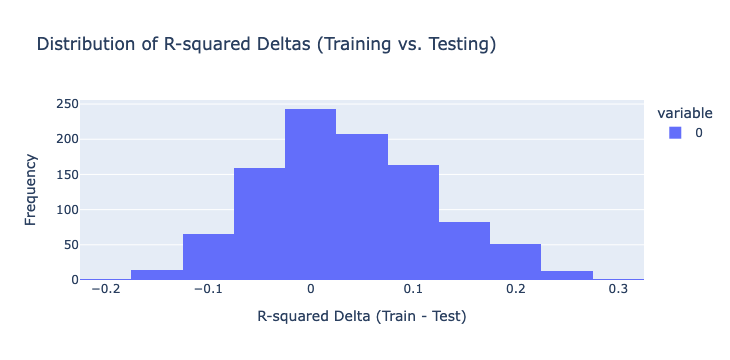

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import plotly.express as px

# Ensure consistent categories in 'Type 1' and 'Type 2' across the entire dataset
pokeaman['Type 1'] = pokeaman['Type 1'].astype('category')
pokeaman['Type 2'] = pokeaman['Type 2'].astype('category')

# Define an empty list to store R-squared deltas
r_squared_deltas = []

# Loop for 100 iterations
for _ in range(1000):
    # Split the data into training and testing sets
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)

    # Define the formula for the OLS model
    model_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
    # And here we'll add the significant indicators from the previous model
    # https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
    model_linear_form += ' + I(Q("Type 1")=="Normal")'
    model_linear_form += ' + I(Q("Type 1")=="Water")'
    model_linear_form += ' + I(Generation==2)'
    model_linear_form += ' + I(Generation==5)'

    # Fit the OLS model to the training data
    model_spec = smf.ols(formula=model_linear_form, data=pokeaman_train)
    model_fit = model_spec.fit()

    # Calculate R-squared for the training set
    r2_train = model_fit.rsquared

    # Calculate R-squared for the testing set
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test['HP']
    r2_test = np.corrcoef(y_test, yhat_test)[0, 1] ** 2

    # Store the difference in R-squared values
    r_squared_deltas.append(r2_train - r2_test)

# Plot the deltas using Plotly
fig = px.histogram(r_squared_deltas, nbins=20, title="Distribution of R-squared Deltas (Training vs. Testing)")
fig.update_xaxes(title_text="R-squared Delta (Train - Test)")
fig.update_yaxes(title_text="Frequency")
fig.show()


In [108]:
sum(r_squared_deltas) / len(r_squared_deltas)

0.02488736600612782

#### 9:

The following code attempts to compare a model trained on Generation 1 Pokemon data with a model trained on Generation 1-5 Pokemon data, to see which one is able to predict Generation 6 Pokemon data the most accurately. 

model6: ``'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk") + I(Q("Type 1")=="Normal") + I(Q("Type 1")=="Water") + I(Generation==2) + I(Generation==5)'``

model7: ``'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk") + I(Q("Type 1")=="Normal") + I(Q("Type 1")=="Water") + I(Generation==2) + I(Generation==5)'``

The first chunk of code compares the original model7 with model7 trained only on Generation 1. As expected, delta R-squared between 'in sample' and 'out of sample' is very very negative for gen1_predict_future, as it has only been trained on generation 1 Pokemon and does not generalize well. **It does, however, do very well on Gen 1 data as it's specialized on that.**

The second chunk of code compares the original model7 with model7 trained on Generation 1-5. As expected, while delta R-squared is still negative, the difference is much less than the first test (only -0.17 compared to -0.46) as **it generalizes much better, having been trained on a larger and more diverse dataset that is more connected to Gen 6.**

The third and fourth chunks of code do the same thing, but just for model6. We can see for model6 that the original model's generalizing is terrible (going from R^2 of 0.33 to almost 0) and the same pattern that **the model trained on Gen1 only does not generalize as well as the model trained on Gen1-5 data.**

In [112]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")


'In sample' R-squared:     0.3327557117602232 (original)
'Out of sample' R-squared: 0.35438289685766466 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363386295031 (gen1_predict_future)


In [113]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")



'In sample' R-squared:     0.3327557117602232 (original)
'Out of sample' R-squared: 0.35438289685766466 (original)
'In sample' R-squared:     0.3904756578094539 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915433285515 (gen1to5_predict_future)


In [114]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")



'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 1.3089076225194694e-05 (original)
'In sample' R-squared:     0.44338805177272833 (gen1_predict_future)
'Out of sample' R-squared: 0.19328585342761895 (gen1_predict_future)


In [115]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")



'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 1.3089076225194694e-05 (original)
'In sample' R-squared:     0.335172798241148 (gen1to5_predict_future)
'Out of sample' R-squared: 0.2626269017879997 (gen1to5_predict_future)


Here's a summary of this specific conversation:

1. **Understanding Model Evaluation**:
   - We discussed the R-squared values printed in the code, focusing on the comparison between "in-sample" and "out-of-sample" R-squared. You were trying to understand why certain R-squared values might be higher or lower for different models and why there might be discrepancies in these values.
   - We went over how to interpret the R-squared value for both training (in-sample) and testing (out-of-sample) data, and how different subsets of the data (like specific generations in your Pokémon dataset) affect model predictions.

2. **Code Breakdown**:
   - You shared a block of code involving several linear regression models (using `smf.ols`), where different subsets of the data were being used to predict "HP" based on the generation of the Pokémon.
   - The code checks both "in-sample" and "out-of-sample" R-squared values, comparing the models' ability to predict HP for different subsets of the data (e.g., Generation 1 vs non-Generation 1, and Generation 1 to 5 vs Generation 6).

3. **Specific Query**:
   - You were curious about the line of code: 
     ```python
     y = pokeaman[pokeaman.Generation!=1].HP
     ```
     which selects data from all Pokémon that are not Generation 1 and tests how the model trained on Generation 1 data performs on this different data. We clarified that this doesn't mean the model predicts Generation 1 data well, but instead shows how well a model trained on one subset (e.g., Generation 1) generalizes to another (e.g., non-Generation 1).

4. **Next Steps**:
   - You are continuing to work through the evaluation of your models, particularly in understanding how to interpret the results in terms of predictive accuracy and fitting for different subsets of your data.

Let me know if you need further clarification on any part!